interactive(children=(FloatSlider(value=5.0, description='U', max=10.0, min=1.0), FloatSlider(value=1.0, descr…

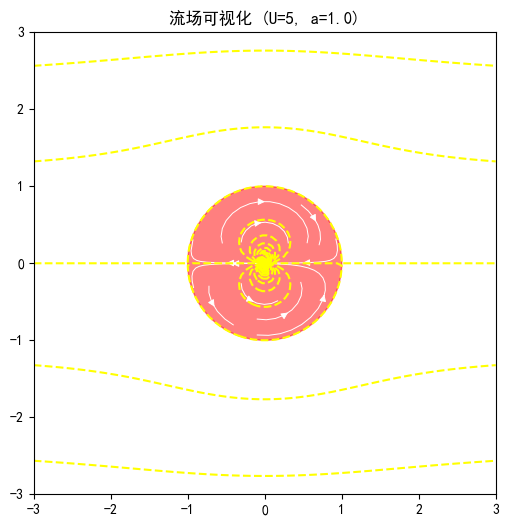

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from ipywidgets import interact
from numba import jit

# 配置中文字体（根据系统可用字体选择）
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'WenQuanYi Zen Hei']  # 常用中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 定义复势函数
def complex_potential(z, U, a):
    return U * (z + a**2 / z)

# 计算速度场
def velocity_field(X, Y, U, a):
    Z = X + 1j * Y
    dPhi_dZ = U * (1 - a**2 / Z**2)
    u, v = dPhi_dZ.real, -dPhi_dZ.imag
    return u, v

# 生成流场图
@interact(U=(1, 10, 0.1), a=(0.5, 2.0, 0.1))
def plot_flow(U=5, a=1.0):
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    u, v = velocity_field(X, Y, U, a)
    
    fig, ax = plt.subplots(figsize=(6,6))
    ax.streamplot(X, Y, u, v, color='white', linewidth=0.7)
    ax.contour(X, Y, np.imag(complex_potential(X + 1j * Y, U, a)), levels=30, colors='yellow', linestyles='dashed')
    
    # 绘制圆柱
    circle = plt.Circle((0, 0), a, color='red', alpha=0.5)
    ax.add_patch(circle)
    
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_aspect('equal')
    ax.set_title(f'流场可视化 (U={U}, a={a})')
    plt.show()

plot_flow()
